In [1]:
import pandas as pd
dataset = pd.read_csv('datasets_9961_14084_Train.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Regression
dataset.shape

(8523, 12)

In [4]:
type(dataset.shape)

tuple

In [5]:
print('Rows: ',dataset.shape[0])
print('Columns: ',dataset.shape[1])

Rows:  8523
Columns:  12


In [6]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
type(dataset.dtypes)

pandas.core.series.Series

In [8]:
dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
l1 = []
for i in dataset.dtypes:
    l1.append(i)
l1

[dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64')]

In [10]:
l2 = []
for i in  dataset.columns:
    print(i)
    l2.append(i)
dict1 = {}
for i in range(len(l2)):
    dict1[l2[i]] = l1[i]
dict1

Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


{'Item_Identifier': dtype('O'),
 'Item_Weight': dtype('float64'),
 'Item_Fat_Content': dtype('O'),
 'Item_Visibility': dtype('float64'),
 'Item_Type': dtype('O'),
 'Item_MRP': dtype('float64'),
 'Outlet_Identifier': dtype('O'),
 'Outlet_Establishment_Year': dtype('int64'),
 'Outlet_Size': dtype('O'),
 'Outlet_Location_Type': dtype('O'),
 'Outlet_Type': dtype('O'),
 'Item_Outlet_Sales': dtype('float64')}

In [11]:
l3= []
for i in sorted(dict1.items()):
    l3.append(i)
l3

[('Item_Fat_Content', dtype('O')),
 ('Item_Identifier', dtype('O')),
 ('Item_MRP', dtype('float64')),
 ('Item_Outlet_Sales', dtype('float64')),
 ('Item_Type', dtype('O')),
 ('Item_Visibility', dtype('float64')),
 ('Item_Weight', dtype('float64')),
 ('Outlet_Establishment_Year', dtype('int64')),
 ('Outlet_Identifier', dtype('O')),
 ('Outlet_Location_Type', dtype('O')),
 ('Outlet_Size', dtype('O')),
 ('Outlet_Type', dtype('O'))]

In [12]:
l3 = list(dataset.select_dtypes(['float64']).columns)
l4 =  list(dataset.select_dtypes(['object']).columns)
dict1 = {}
#dict3 = {i:'object' if i in l4 else i:'float64' if i in l3 for i in dataset.columns }
for i in dataset.columns:
    if i in l4:
        
        dict1[i] ='object'
    elif i in l3:
        dict1[i] = 'float64'
dict2 = sorted(dict1.items(), key  = lambda x: x[1])
dict2
#dict3

[('Item_Weight', 'float64'),
 ('Item_Visibility', 'float64'),
 ('Item_MRP', 'float64'),
 ('Item_Outlet_Sales', 'float64'),
 ('Item_Identifier', 'object'),
 ('Item_Fat_Content', 'object'),
 ('Item_Type', 'object'),
 ('Outlet_Identifier', 'object'),
 ('Outlet_Size', 'object'),
 ('Outlet_Location_Type', 'object'),
 ('Outlet_Type', 'object')]

In [13]:
dataset['Item_Weight'].isnull().sum()

1463

In [14]:
dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:

dataset['Item_Visibility'].mean()

0.06613202877895127

In [16]:
dataset.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [17]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
dataset['Item_Weight'].isnull().sum()

1463

In [19]:
dataset['Item_Weight'].interpolate(inplace = True)

In [20]:
for i in dataset.columns:
    print(i,dataset[i].isnull().sum())

Item_Identifier 0
Item_Weight 0
Item_Fat_Content 0
Item_Visibility 0
Item_Type 0
Item_MRP 0
Outlet_Identifier 0
Outlet_Establishment_Year 0
Outlet_Size 2410
Outlet_Location_Type 0
Outlet_Type 0
Item_Outlet_Sales 0


In [21]:
dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0],inplace = True)

In [22]:
dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].map({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular','Low Fat':'Low Fat','Regular':'Regular'})

In [24]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [26]:
#item visibility ka 0 ko replace
import numpy as np
dataset['Item_Visibility'] = np.where(dataset['Item_Visibility'] == 0.0,np.nan,dataset['Item_Visibility'])
dataset['Item_Visibility'] = dataset.groupby('Item_Type')['Item_Visibility'].transform(lambda x:x.fillna(x.mean()))

In [27]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.073719,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064963,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


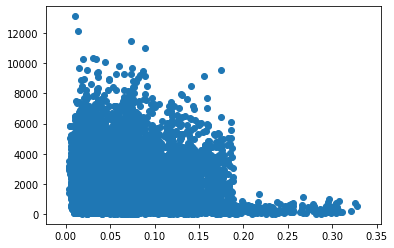

In [28]:
plt.scatter(x=dataset['Item_Visibility'], y=dataset['Item_Outlet_Sales']);

plt.show(block=True);

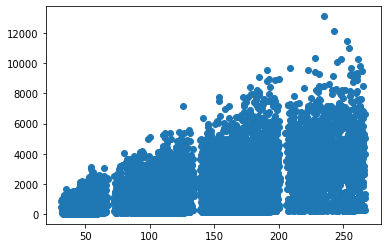

In [29]:
plt.scatter(x=dataset['Item_MRP'], y=dataset['Item_Outlet_Sales']);

plt.show(block=True);

In [35]:
dataset['Item_Outlet_Sales'].groupby('Outlet_Size')

KeyError: 'Outlet_Size'

In [33]:
dataset['Outlet_Size'].nunique()

3